# 사물 이미지 분류 경진대회 EDA

안녕하세요! 사물 이미지 분류 경진대회로 돌아온 데이콘 Basic 입니다!

이번 대회는 주어진 10 종류의 이미지와 라벨을 이용해 test셋의 이미지들을 적절한 라벨로 분류하는 대회입니다.

label은 0에서부터 9까지의 정수 값으로 이루어져 있습니다.

대회를 시작하기 앞서 어떤 데이터가 주어졌고 어떤 방식으로 활용할 수 있을지

데이터를 분석하고 시각화하며 인사이트를 얻어내는 작업이 필요합니다.

## 데이터 로드

필요한 패키지를 임포트하고 분석 환경을 적절히 설정해줍니다.

In [1]:
import os
import numpy as np
import warnings
warnings.filterwarnings(action='ignore') # 경고 메세지 숨김
from glob import glob
import numpy as np
import matplotlib
import seaborn as sns
import PIL
PIL.Image

<module 'PIL.Image' from 'C:\\Users\\east1\\Anaconda3\\lib\\site-packages\\PIL\\Image.py'>

In [2]:
# import tensorflow as tf

In [3]:
# from keras.datasets import cifar10

In [4]:
# (training_images, training_labels), (test_images, test_labels) = cifar10.load_data()

주어진 데이터를 불러오기 위해 다음 함수를 사용하겠습니다. 

함수의 인스턴스인 path에 이미지 데이터 파일의 경로를 입력하면 image와 label을 각각 array 값으로 return 해줍니다.

In [5]:
# 데이터를 불러올 함수를 정의합니다.
def load_CIFAR10(path):
    
    path = path
    images = []
    labels = []
    for filename in glob(path +"*"):
        for img in glob(filename + "/*.jpg"):
            an_img = PIL.Image.open(img) #read img
            img_array = np.array(an_img) #img to array
            images.append(img_array) #append array to training_images
#             print(filename)
            label = filename.split('\\')[1] #get label
            labels.append(label) #append label
    images = np.array(images)
    labels = np.array(labels)

    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    labels= le.fit_transform(labels)
    labels = labels.reshape(-1,1)
    
    return images, labels

살펴볼 train 데이터를 불러오겠습니다.

In [6]:
training_images, training_labels = load_CIFAR10(path='./data/train/') # path를 다음과 같이 train 폴더로 설정합니다.

## 간단한 EDA

데이터를 분석하기 위해서는 먼저 적절한 탐색이 필요합니다.

이미지 데이터를 전반적으로 살펴보겠습니다.

먼저 이미지 데이터의 크기(shape)를 확인합니다.

In [7]:
print("train 이미지 크기:", training_images.shape)
print("train 라벨 크기:", training_labels.shape)

train 이미지 크기: (50000, 32, 32, 3)
train 라벨 크기: (50000, 1)


총 5만 개의 이미지가 존재합니다. train 이미지에서 마지막 숫자 3은 RGB 값을 나타냅니다.

카테고리별 이미지가 순서대로 정렬되어 있기 때문에 random 함수를 사용해 랜덤하게 10개 이미지를 출력해보겠습니다.

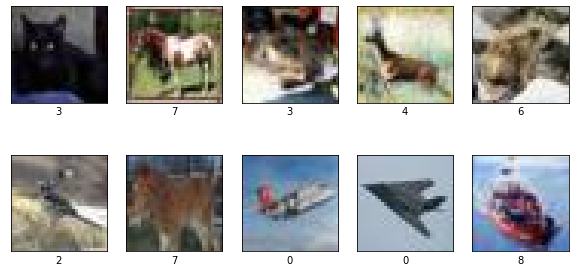

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[10,5])
for i in range(10):
    import random
    num = random.randint(0,50000)
    plt.subplot(2, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(training_labels[num][0])
    plt.imshow(training_images[num])
plt.show()

자동차, 배, 강아지, 비행기 등 다양한 종류의 이미지들이 존재함을 알 수 있습니다.

실제로 라벨이 0~9인지 확인하기 위해 라벨의 unique값을 확인합니다.

In [9]:
print(np.unique(training_labels))

[0 1 2 3 4 5 6 7 8 9]


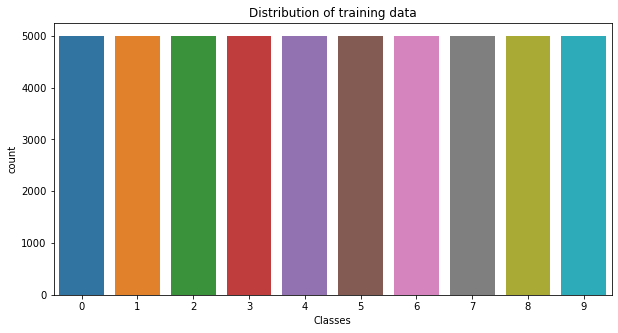

In [10]:
plt.figure(figsize=[10,5])
sns.countplot(training_labels.ravel())
plt.title('Distribution of training data')
plt.xlabel('Classes')
plt.show()

모든 클래스가 5000개씩 균일하게 분포하는 것을 확인했습니다.

학습에 있어 특별히 다른 처리 과정이 필요해 보이지는 않네요!

긍/부정 라벨에 따라 등장하는 단어가 카테고리에 잘 분리되었습니다!

이제 이 노트북에서 데이터를 둘러보는 작업은 마무리하겠습니다.

여러분은 어떤 인사이트를 얻으셨나요?

이번 EDA를 통해 어떤 방식으로 분석을 진행해야겠다는 자그마한 인사이트를 얻으셨으면 좋겠습니다.

여러분도 여러분만의 EDA를 진행하시고 코드공유에 올려주세요!

좋아요를 많이 받으시는 분께는 데이콘 후드가 제공됩니다!